## **Setup the environment**

In [ ]:
! wget https://www.lancaster.ac.uk/scc/sites/lora/lorasim-20170710.tgz
! tar -xvf lorasim-20170710.tgz

!sudo apt-get install python2 && curl https://bootstrap.pypa.io/pip/2.7/get-pip.py -o get-pip.py && python2 get-pip.py && rm get-pip.py
!sudo apt install python-tk
!pip2 install -r 'lorasim/requirements.txt'


## **Play with the simulator**

### **Import libraries**

In [ ]:
import os
import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt
import subprocess

### **Dynamic Parameters**

In [ ]:
def simulate(n_nodes, tx_rate, exp, duration):
    env = os.environ.copy()
    env["MPLBACKEND"] = "Agg"

    # Use subprocess.run to execute the command and capture output
    result = subprocess.run(
        [
            "python2",
            "lorasim/loraDir.py",
            str(int(n_nodes)),
            str(int(tx_rate)),
            str(int(exp)),
            str(int(duration)),
            str(1)
        ],
        env=env,
        capture_output=True,
        text=True,  # Capture output as text
    )

    # Print the output
    # print(result.stdout)
    # print(result.stderr)

In [ ]:
duration = 86400000
tx_rate = 1000000

for n_nodes in [1, 50] + list(range(100,1000,100)) + list(range(1000,1601,200)):
  print(f"Simulating {n_nodes} nodes")
  simulate(n_nodes, tx_rate, 4, duration)
  simulate(n_nodes, tx_rate, 3, duration)
  simulate(n_nodes, tx_rate, 5, duration)

Simulating 1 nodes
Simulating 50 nodes
Simulating 100 nodes
Simulating 200 nodes
Simulating 300 nodes
Simulating 400 nodes
Simulating 500 nodes
Simulating 600 nodes
Simulating 700 nodes
Simulating 800 nodes
Simulating 900 nodes
Simulating 1000 nodes
Simulating 1200 nodes
Simulating 1400 nodes
Simulating 1600 nodes


In [ ]:
data4 = pd.read_csv("exp4.dat", sep=" ")
data3 = pd.read_csv("exp3.dat", sep=" ")
data5 = pd.read_csv("exp5.dat", sep=" ")

In [ ]:
data4["der"] = (data4["nrTransmissions"] - data4["nrCollisions"]) / data4["nrTransmissions"]
data3["der"] = (data3["nrTransmissions"] - data3["nrCollisions"]) / data3["nrTransmissions"]
data5["der"] = (data5["nrTransmissions"] - data5["nrCollisions"]) / data5["nrTransmissions"]

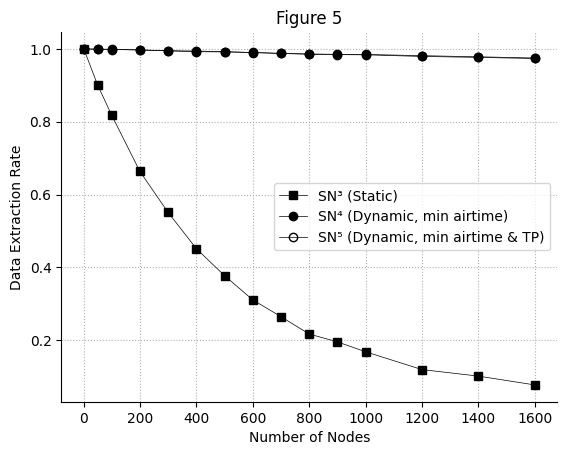

In [ ]:
plt.plot(data4["#nrNodes"], data4["der"], 'k-s', label="SN³ (Static)", lw=0.5)
plt.plot(data3["#nrNodes"], data3["der"], 'k-o', label="SN⁴ (Dynamic, min airtime)", lw=0.5)
plt.plot(data5["#nrNodes"], data5["der"], 'k-o', label="SN⁵ (Dynamic, min airtime & TP)", markerfacecolor='none', lw=0.5)
plt.title("Figure 5")
plt.xlabel("Number of Nodes")
plt.ylabel("Data Extraction Rate")
plt.legend()
plt.grid(linestyle=':')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

### **Multiple Basestations**

In [ ]:
def simulateMul(n_nodes, tx_rate, exp, duration, n_basestations):
    env = os.environ.copy()
    env["MPLBACKEND"] = "Agg"

    # Use subprocess.run to execute the command and capture output
    result = subprocess.run(
        [
            "python2",
            "lorasim/loraDirMulBS.py",
            str(int(n_nodes)),
            str(int(tx_rate)),
            str(int(exp)),
            str(int(duration)),
            str(int(n_basestations)),
            str(1)
        ],
        env=env,
        capture_output=True,
        text=True,  # Capture output as text
    )

    # Print the output
    # print(result.stdout)
    # print(result.stderr)

In [ ]:
duration = 86400000
tx_rate = 1000000

for n_nodes in [1,50] + list(range(100,1000,100)) + list(range(1000,1601,200)):
  print(f"Simulating {n_nodes} nodes")
  simulateMul(n_nodes, tx_rate, 1, duration, 1)
  simulateMul(n_nodes, tx_rate, 1, duration, 2)
  simulateMul(n_nodes, tx_rate, 1, duration, 3)
  simulateMul(n_nodes, tx_rate, 1, duration, 4)
  simulateMul(n_nodes, tx_rate, 1, duration, 8)
  simulateMul(n_nodes, tx_rate, 1, duration, 24)

Simulating 1 nodes
Simulating 50 nodes
Simulating 100 nodes
Simulating 200 nodes
Simulating 300 nodes
Simulating 400 nodes
Simulating 500 nodes
Simulating 600 nodes
Simulating 700 nodes
Simulating 800 nodes
Simulating 900 nodes
Simulating 1000 nodes
Simulating 1200 nodes
Simulating 1400 nodes
Simulating 1600 nodes


In [16]:
data1 = pd.read_csv("exp1BS1.dat", sep=" ")
data2 = pd.read_csv("exp1BS2.dat", sep=" ")
data3 = pd.read_csv("exp1BS3.dat", sep=" ")
data4 = pd.read_csv("exp1BS4.dat", sep=" ")
data8 = pd.read_csv("exp1BS8.dat", sep=" ")
data24 = pd.read_csv("exp1BS24.dat", sep=" ")

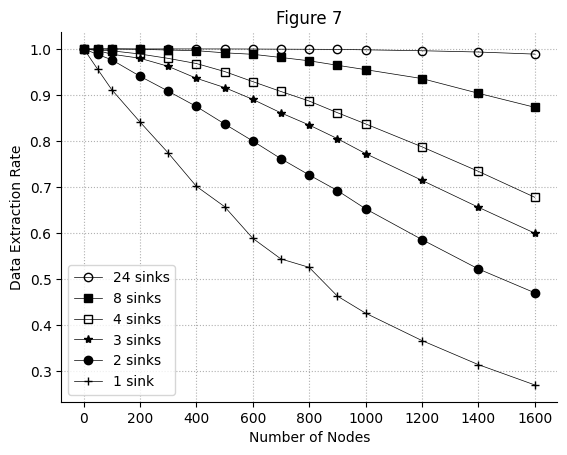

In [17]:
plt.plot(data24["#nrNodes"], data24["DER"], 'k-o', label="24 sinks", markerfacecolor='none', lw=0.5)
plt.plot(data8["#nrNodes"], data8["DER"], 'k-s', label="8 sinks", lw=0.5)
plt.plot(data4["#nrNodes"], data4["DER"], 'k-s', label="4 sinks", markerfacecolor='none', lw=0.5)
plt.plot(data3["#nrNodes"], data3["DER"], 'k-*', label="3 sinks", lw=0.5)
plt.plot(data2["#nrNodes"], data2["DER"], 'k-o', label="2 sinks", lw=0.5)
plt.plot(data1["#nrNodes"], data1["DER"], 'k-+', label="1 sink", lw=0.5)
plt.title("Figure 7")
plt.xlabel("Number of Nodes")
plt.ylabel("Data Extraction Rate")
plt.legend()
plt.grid(linestyle=':')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()